[[1 1]
 [1 3]
 [3 0]
 [3 2]]


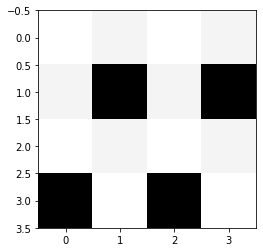

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from typing import Tuple

QUEEN_INDENTIFIER = 22

# def horizontal_attack(board: np.array, initial_position: Tuple[int, int]) -> int:
#     """
#     Walk horizontally throught the board, trying to find another queens.
#     """
#     horizontal_finds = 0
#     row = initial_position[0]
#     column = initial_position[1]

#     while True:
#         try:
#             next_side_square = board[row, column + 1]
#             if next_side_square == QUEEN_INDENTIFIER:
#                 horizontal_finds += 1
#         except:
#             return horizontal_finds


# self.game_board = builder // parece fazer mais sentido que a classe gere automaticamente o seu tabuleiro

class Board():
    def __init__(self, N: int) -> None:
        self.first_coordinate = N
        self.second_coordinate = N
        self.game_board = None

    def builder(self) -> np.array:
        self.game_board = np.zeros((self.first_coordinate, self.second_coordinate))
        self.game_board[1::2, 0::2] = 1
        self.game_board[0::2, 1::2] = 1
        
        return self.game_board

    def queens_generator(self, board: np.array) -> np.array:
        for j in range(len(board)):
            queens_row = randint(0, len(board) - 1)
            queens_column = j
            board[queens_row, queens_column] = QUEEN_INDENTIFIER # this integer number gives the distinct color

        plt.imshow(board, cmap='binary')
        print(np.argwhere(board == QUEEN_INDENTIFIER))
        """ Uma simples aritmetica com o resultado de argwhere ja nos nada o resultado das rainhas que sao encontradas por determinada rainha.
            Podemos por exemplo olhar sempre para a próxima rainha e ver se ela se encaixa em 1 de 3 casos em relação a rainha base: estar na
            mesma linha, estar na diagonal superior ou estar na diagonal inferior. Para a diagonal seria interessante ver se a diferenca de
            coordenadas em x e y eh igual, ou seja, subiu (ou desceu) 2 e 2 em relacao a posicao inical."""

        return board

    def queens_attacks(self, board: np.array) -> int:
        pass
            
def main():
    sizes = [int(element) for element in input("Enter the board's size: ").split()]
    board = Board(sizes[0])
    game_board = board.builder()

    boards = []

    for _ in range(1):
        board_with_queens = board.queens_generator(game_board)
        boards.append(board_with_queens)
    

if __name__ == '__main__':
    main()

In [45]:
x = np.arange(15)
x.shape = (3,5)

print(x)

column = x[:,3]

arr = np.argwhere(x % 2 == 0).tolist()
arr = sorted(arr, key=lambda element: element[1])

for n in arr:
    print(n)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[0, 0]
[2, 0]
[1, 1]
[0, 2]
[2, 2]
[1, 3]
[0, 4]
[2, 4]
